In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# 1. Load dataset into Pandas Data Frame (5)
data = pd.read_csv('AirQualityUCI.csv', sep=';')

# 2. Display the entries in data (5)
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [2]:
# 3. Check the shape (5)
print(data.shape)

(9471, 17)


In [3]:
# 4. Fetch the column name (5)
print(data.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [4]:
# 5. Check whether data contains missing value or not. if require, pre-process the data. (15)
print(data.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [5]:
# remove none values from the data
data = data[data['RH'].notna()]

In [6]:
# typecaste the RH column to float
data['RH'] = data['RH'].str.replace(',', '')
data['RH'] = data['RH'].astype(float)

# typecaste the AH column to float
data['AH'] = data['AH'].str.replace(',', '')
data['AH'] = data['AH'].astype(float)

### 80:20

In [7]:
X = data['RH'].values.reshape(-1, 1)
Y = data['AH'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("The equation of the line is Y = ", regressor.coef_, "X + ", regressor.intercept_)

The equation of the line is Y =  [[8.26811219]] X +  [6000.39227289]


Mean squared error: 17029811.54
Variance score: 0.15


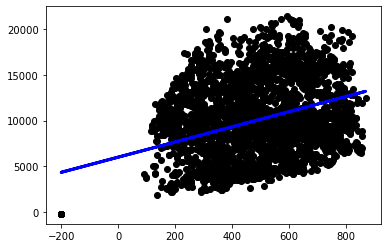

In [8]:
# 6. Perform the prediction on the test dataset. (10)
Y_pred = regressor.predict(X_test)

# 7. Check the performance of the model on test dataset by Calculating the ‘Mean Squared Error' (MSE) and R2-Score (Hint: sklearn.metrics.mean_squared_error function) (10)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# 8. Plot the regression line for test dataset (i.e., Y_pred vs Y_actual) (Hint: Use scatter plot and line plot of Matplotlib Library) (10)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.show()

### 70:30

In [9]:
X = data['RH'].values.reshape(-1, 1)
Y = data['AH'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print("The equation of the line is Y = ", regressor.coef_, "X + ", regressor.intercept_)

The equation of the line is Y =  [[8.2056072]] X +  [6027.4571956]


Mean squared error: 17391935.91
Variance score: 0.16


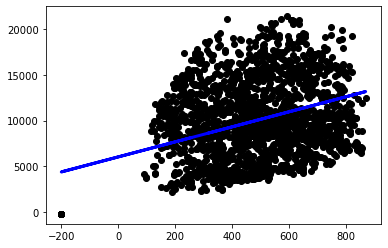

In [10]:
# 6. Perform the prediction on the test dataset. (10)
Y_pred = regressor.predict(X_test)

# 7. Check the performance of the model on test dataset by Calculating the ‘Mean Squared Error' (MSE) and R2-Score (Hint: sklearn.metrics.mean_squared_error function) (10)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

# 8. Plot the regression line for test dataset (i.e., Y_pred vs Y_actual) (Hint: Use scatter plot and line plot of Matplotlib Library) (10)
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.show()

In [11]:
# 14

M of the line is [[0.00254709]] and C of the line is [9856.15581312]
The equation of the line is Y =  [[0.00254709]] X +  [9856.15581312]
Mean squared error: 20101209.04
Variance score: -0.00


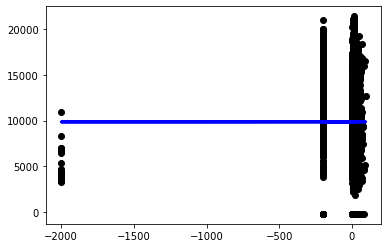

In [12]:
try:
    data = data[data['CO(GT)'].notna()]
    data['CO(GT)'] = data['CO(GT)'].str.replace(',', '')
    data['CO(GT)'] = data['CO(GT)'].astype(float)
    X = data['CO(GT)'].values.reshape(-1, 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    print("M of the line is", regressor.coef_ , "and C of the line is", regressor.intercept_)
    print("The equation of the line is Y = ", regressor.coef_, "X + ", regressor.intercept_)
    Y_pred = regressor.predict(X_test)

    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

    plt.scatter(X_test, Y_test,  color='black')
    plt.plot(X_test, Y_pred, color='blue', linewidth=3)
    plt.show()
except Exception as e:
    print(e)

M of the line is [[5.81696085]] and C of the line is [3756.78468964]
The equation of the line is Y =  [[5.81696085]] X +  [3756.78468964]
Mean squared error: 16835287.77
Variance score: 0.16


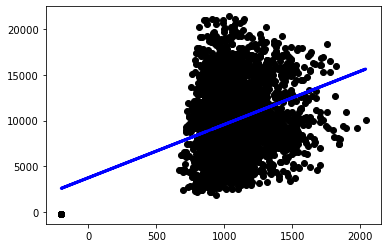

In [13]:
try:
    data = data[data['PT08.S1(CO)'].notna()]
    data['PT08.S1(CO)'] = data['PT08.S1(CO)'].replace(',', '')
    data['PT08.S1(CO)'] = data['PT08.S1(CO)'].astype(float)
    X = data['PT08.S1(CO)'].values.reshape(-1, 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    print("M of the line is", regressor.coef_ , "and C of the line is", regressor.intercept_)
    print("The equation of the line is Y = ", regressor.coef_, "X + ", regressor.intercept_)
    Y_pred = regressor.predict(X_test)

    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

    plt.scatter(X_test, Y_test,  color='black')
    plt.plot(X_test, Y_pred, color='blue', linewidth=3)
    plt.show()
except Exception as e:
    print(e)

M of the line is [[-3.37331598]] and C of the line is [9321.30526697]
The equation of the line is Y =  [[-3.37331598]] X +  [9321.30526697]
Mean squared error: 19937928.37
Variance score: 0.01


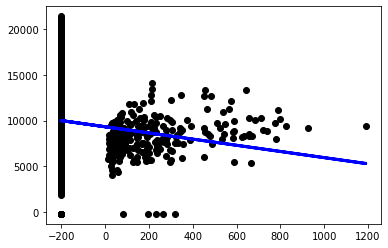

In [14]:
try:
    data = data[data['NMHC(GT)'].notna()]
    data['NMHC(GT)'] = data['NMHC(GT)'].replace(',', '')
    data['NMHC(GT)'] = data['NMHC(GT)'].astype(float)
    X = data['NMHC(GT)'].values.reshape(-1, 1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)

    print("M of the line is", regressor.coef_ , "and C of the line is", regressor.intercept_)
    print("The equation of the line is Y = ", regressor.coef_, "X + ", regressor.intercept_)
    Y_pred = regressor.predict(X_test)

    print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
    print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

    plt.scatter(X_test, Y_test,  color='black')
    plt.plot(X_test, Y_pred, color='blue', linewidth=3)
    plt.show()
except Exception as e:
    print(e)

In [15]:
"""
Mean squared error: 20101209.04
Mean squared error: 16835287.77
Mean squared error: 19937928.37
"""

'\nMean squared error: 20101209.04\nMean squared error: 16835287.77\nMean squared error: 19937928.37\n'